In [22]:
import pandas as pd # Importamos las librerías que vamos a necesitar o podemos necesitar
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import numpy as np
import warnings
warnings.filterwarnings('ignore')   # Para quitar los warnings
import matplotlib.pyplot as plt
import pylab as plt # para "pintar"
import seaborn as sns

In [20]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

In [40]:
from scipy.stats import shapiro
from scipy.stats import levene

In [44]:
from sklearn.preprocessing import StandardScaler

In [16]:
# from scipy.stats import f_two_way --> No chuta, ya no está disponible.

In [5]:
pokenova = pd.read_csv('../data/pokefinal.csv', encoding = 'ISO-8859-1')

In [7]:
pokenova.tail() # Al cargar el archivo, nos crea una columna "Unnamed: 0" que dropearemos a continuación, y la columna
# number pierde el formado (la dejaremos así, porque no nos afecta).

,Unnamed: 0,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
1005,1005,1006,Iron Valiant,5,6,Fairy-Fighting,590,74,130,90,120,60,116,9,246,236,224,220,180,phy_sweeper,normal,14,350,white,genderless,50,12800,10,0,295,slow,1250000,No-Eggs,No eggs
1006,1006,1007,Koraidon,6,3,Fighting-Dragon,670,100,135,115,85,100,135,9,270,220,315,250,185,wall,legendary,25,3030,red,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1007,1007,1008,Miraidon,4,3,Electric-Dragon,670,100,85,100,135,115,135,9,220,270,315,185,250,wall,legendary,35,2400,blue,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1008,1008,1009,Walking Wake,18,3,Water-Dragon,590,99,83,91,125,83,109,9,192,234,273,174,208,wall,normal,35,2800,blue,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs
1009,1009,1010,Iron Leaves,10,15,Grass-Psychic,590,90,130,88,70,108,104,9,234,174,286,218,178,wall,normal,15,1250,green,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs


In [8]:
# Dropeamos "Unnamed: 0"
pokenova = pokenova.drop(["Unnamed: 0"], axis=1)

pokenova.head() # Arreglado.

,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
0,1,Bulbasaur,10,14,Grass-Poison,318,45,49,49,65,65,45,1,94,110,159,98,130,wall,starter,7,69,green,both,20,5120,45,50,64,medium-slow,1059860,Monster,Grass
1,2,Ivysaur,10,14,Grass-Poison,405,60,62,63,80,80,60,1,122,140,203,125,160,wall,starter,10,130,green,both,20,5120,45,50,142,medium-slow,1059860,Monster,Grass
2,3,Venusaur,10,14,Grass-Poison,525,80,82,83,100,100,80,1,162,180,263,165,200,wall,starter,20,1000,green,both,20,5120,45,50,263,medium-slow,1059860,Monster,Grass
3,4,Charmander,7,19,Fire,309,39,52,43,60,50,65,1,117,125,132,95,110,wall,starter,6,85,red,both,20,5120,45,50,62,medium-slow,1059860,Monster,Dragon
4,5,Charmeleon,7,19,Fire,405,58,64,58,80,65,80,1,144,160,181,122,145,wall,starter,11,190,red,both,20,5120,45,50,142,medium-slow,1059860,Monster,Dragon


In [9]:
pokenova.shape # Tenemos 1010 registros (Pokémon) y 33 columnas.

(1010, 33)

In [11]:
# Vamos a comenzar con el estudio de ANOVAS; esto es, vamos a testear tres o más muestras. Nuestras muestras van a venir
# determinadas por las distintas generaciones Pokémon.

# Agrupamos los datos por generación:
gr_by_gen = pokenova.groupby('generation')

In [17]:
# Extraemos los datos de velocidad de cada grupo y los pasarmos como argumentos a f_oneway()
f_value, p_value = f_oneway(gr_by_gen.get_group(1)["speed"],
                            gr_by_gen.get_group(2)["speed"],
                            gr_by_gen.get_group(3)["speed"],
                            gr_by_gen.get_group(4)["speed"],
                            gr_by_gen.get_group(5)["speed"],
                            gr_by_gen.get_group(6)["speed"],
                            gr_by_gen.get_group(7)["speed"],
                            gr_by_gen.get_group(8)["speed"],
                            gr_by_gen.get_group(9)["speed"])

 # Cuando se agrupan los datos por generación, la función f_oneway() calcula la media de los datos para cada grupo y 
# utiliza esas medias para realizar la ANOVA.

In [18]:
f_value, p_value

(2.361203542491456, 0.01614182944448283)

In [19]:
# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

Hay diferencias significativas en la velocidad entre al menos dos generaciones.


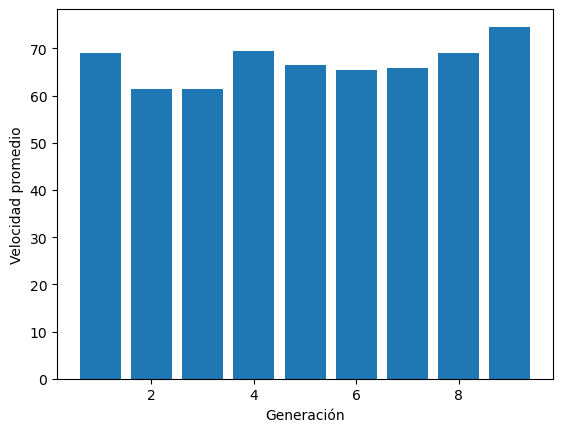

In [24]:
# calcular la velocidad promedio de cada generación
mean_speed = pokenova.groupby("generation")["speed"].mean()

# graficar la velocidad promedio de cada generación
plt.bar(mean_speed.index, mean_speed.values)
plt.xlabel("Generación")
plt.ylabel("Velocidad promedio")
plt.show()

In [37]:
# Vamos a ver qué sucede con Kruskal-Wallis

# Extraemos los datos de velocidad de cada generación:
gen1_speed = pokenova[pokenova["generation"] == 1]["speed"]
gen2_speed = pokenova[pokenova["generation"] == 2]["speed"]
gen3_speed = pokenova[pokenova["generation"] == 3]["speed"]
gen4_speed = pokenova[pokenova["generation"] == 4]["speed"]
gen5_speed = pokenova[pokenova["generation"] == 5]["speed"]
gen6_speed = pokenova[pokenova["generation"] == 6]["speed"]
gen7_speed = pokenova[pokenova["generation"] == 7]["speed"]
gen8_speed = pokenova[pokenova["generation"] == 8]["speed"]
gen9_speed = pokenova[pokenova["generation"] == 9]["speed"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed, gen8_speed,
                          gen9_speed)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

Hay diferencias significativas en la velocidad entre al menos dos generaciones.


¿Cómo saber si usar ANOVA o Kruskal-Wallis? --> Veamos los supuestos para hacer ANOVA:

- NORMALIDAD.
- HOMOGENEIDAD DE VARIANZAS.
- INDEPENDENCIA.

Vamos a ver cada supuesto para las nueve muestras que tenemos (generaciones).

In [39]:
# Normalidad:

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_speed)
shapiro_gen2 = shapiro(gen2_speed)
shapiro_gen3 = shapiro(gen3_speed)
shapiro_gen4 = shapiro(gen4_speed)
shapiro_gen5 = shapiro(gen5_speed)
shapiro_gen6 = shapiro(gen6_speed)
shapiro_gen7 = shapiro(gen7_speed)
shapiro_gen8 = shapiro(gen8_speed)
shapiro_gen9 = shapiro(gen9_speed)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.982, p-value=0.049
Generación 2: statistic=0.982, p-value=0.183
Generación 3: statistic=0.965, p-value=0.002
Generación 4: statistic=0.976, p-value=0.052
Generación 5: statistic=0.973, p-value=0.004
Generación 6: statistic=0.957, p-value=0.016
Generación 7: statistic=0.964, p-value=0.014
Generación 8: statistic=0.952, p-value=0.001
Generación 9: statistic=0.982, p-value=0.162


In [41]:
# No todas las muestras siguen una distribución normal; vamos a ver qué pasa con las otras dos pruebas y tomamos decisiones

# Realizamos el test de Levene para verificar la homogeneidad de varianzas:

levene_test = levene(gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed, gen8_speed,
                    gen9_speed)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.346, p-value=0.217


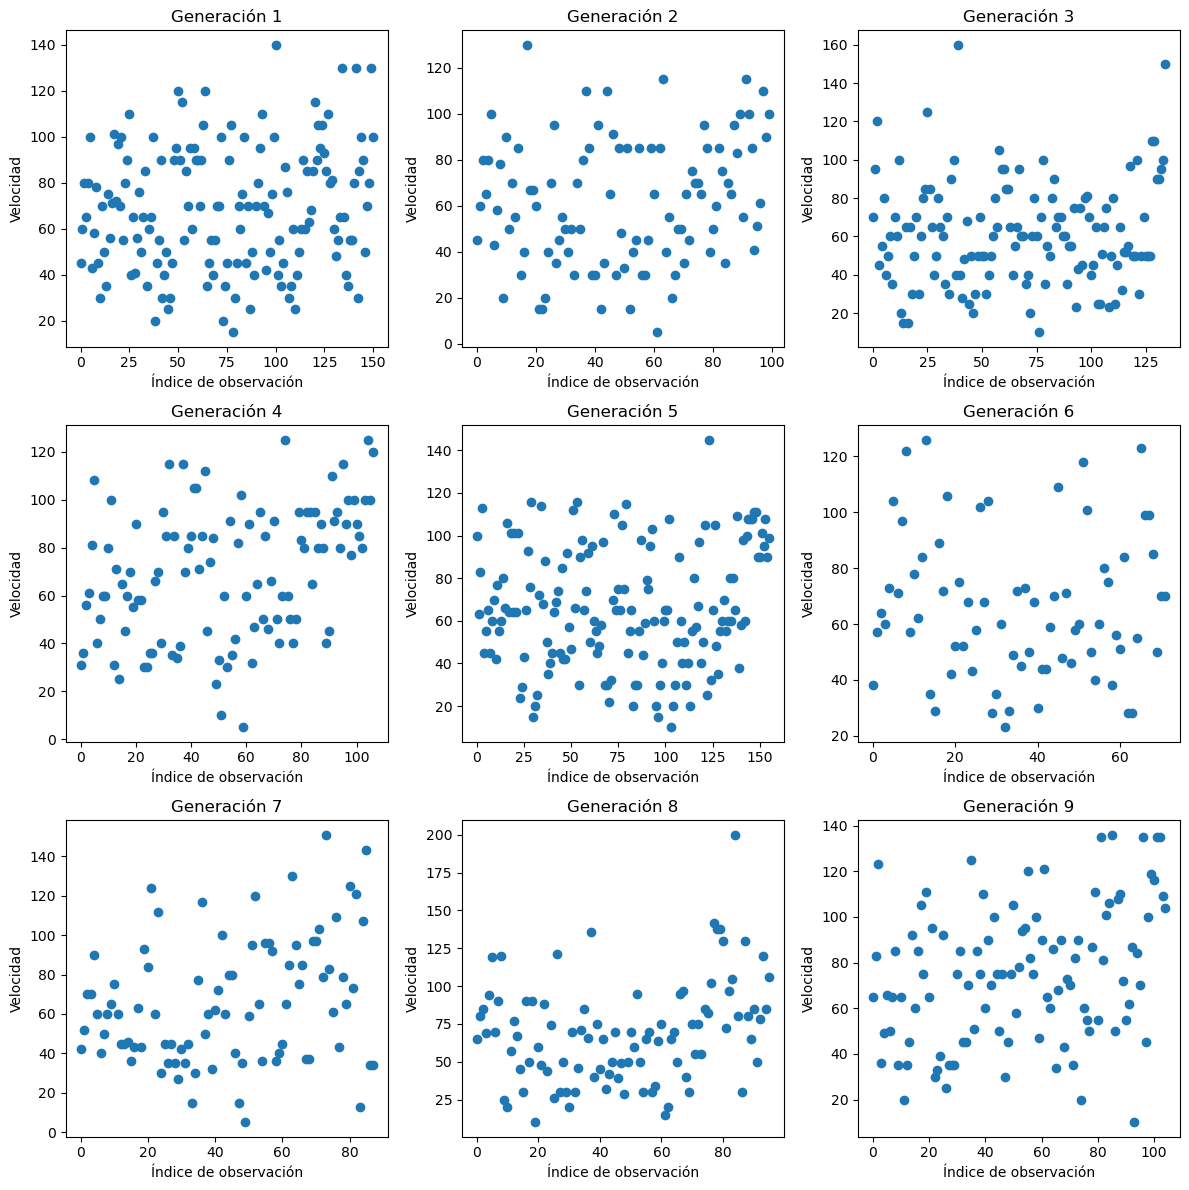

In [42]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_speed in enumerate([gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed,
                              gen8_speed, gen9_speed]):
    axs[i].scatter(range(len(gen_speed)), gen_speed)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Velocidad")
fig.tight_layout()
plt.show()

**CHAT GPT says**:

"En general, para verificar la independencia de las observaciones en cada grupo, se espera ver una nube de puntos dispersos sin patrones o tendencias claras en el gráfico de dispersión. Si los puntos están distribuidos aleatoriamente, sin seguir ninguna tendencia en particular, se puede suponer que las observaciones son independientes."

Esto es lo que observo, por lo que podemos decir que las muestras son independientes.

Tomamos, pues, la decisión de normalizar los datos para emplear ANOVA en lugar de Kruskal-Wallis, ya que si se cumplen los supuestos, la prueba de ANOVA es más potente y precisa que la prueba de Kruskal-Wallis y se pueden realizar pruebas post hoc para identificar las diferencias significativas entre parejas de muestras (en caso de que el mensaje que hayamos recibido al pasar la f_oneway nos indique precisamente eso, que existen diferencias significativas). Haremos esto, aunque sabemos que la normalización puede no ser adecuada o incluso contraproducente en algunas ocasiones.

In [45]:
# Vamos a normalizar:

gen1_speed_norm = StandardScaler().fit_transform(gen1_speed.values.reshape(-1, 1))
gen2_speed_norm = StandardScaler().fit_transform(gen2_speed.values.reshape(-1, 1))
gen3_speed_norm = StandardScaler().fit_transform(gen3_speed.values.reshape(-1, 1))
gen4_speed_norm = StandardScaler().fit_transform(gen4_speed.values.reshape(-1, 1))
gen5_speed_norm = StandardScaler().fit_transform(gen5_speed.values.reshape(-1, 1))
gen6_speed_norm = StandardScaler().fit_transform(gen6_speed.values.reshape(-1, 1))
gen7_speed_norm = StandardScaler().fit_transform(gen7_speed.values.reshape(-1, 1))
gen8_speed_norm = StandardScaler().fit_transform(gen8_speed.values.reshape(-1, 1))
gen9_speed_norm = StandardScaler().fit_transform(gen9_speed.values.reshape(-1, 1))

In [46]:
# Una vez normalizados los datos de velocidad, pasamos

f_value, p_value = f_oneway(gen1_speed_norm, gen2_speed_norm, gen3_speed_norm, gen4_speed_norm, gen5_speed_norm, gen6_speed_norm, gen7_speed_norm, gen8_speed_norm, gen9_speed_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

# Con los datos normalizados, el asunto cambia.

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Vamos a ir haciendo ANOVA's por diferentes bloques para ver si hay diferencias significativas o no entre generaciones; como hemos empezando probando con velocidad, vamos a seguir ahora con el resto de estadísticas: HP, ATTACK, DEFENSE, SP_ATTACK y SP_DEFENSE. A este bloque lo llamaremos **BLOQUE STATS**. No vamos a normalizar de primeras, sino que vamos a ver si se cumplen primero los supuestos y, en función de los que se cumplan, hacemos la prueba de f_oneway o la de kruskal.

In [47]:
# Seguimos con hp:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_hp = pokenova[pokenova["generation"] == 1]["hp"]
gen2_hp = pokenova[pokenova["generation"] == 2]["hp"]
gen3_hp = pokenova[pokenova["generation"] == 3]["hp"]
gen4_hp = pokenova[pokenova["generation"] == 4]["hp"]
gen5_hp = pokenova[pokenova["generation"] == 5]["hp"]
gen6_hp = pokenova[pokenova["generation"] == 6]["hp"]
gen7_hp = pokenova[pokenova["generation"] == 7]["hp"]
gen8_hp = pokenova[pokenova["generation"] == 8]["hp"]
gen9_hp = pokenova[pokenova["generation"] == 9]["hp"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_hp)
shapiro_gen2 = shapiro(gen2_hp)
shapiro_gen3 = shapiro(gen3_hp)
shapiro_gen4 = shapiro(gen4_hp)
shapiro_gen5 = shapiro(gen5_hp)
shapiro_gen6 = shapiro(gen6_hp)
shapiro_gen7 = shapiro(gen7_hp)
shapiro_gen8 = shapiro(gen8_hp)
shapiro_gen9 = shapiro(gen9_hp)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.850, p-value=0.000
Generación 2: statistic=0.809, p-value=0.000
Generación 3: statistic=0.934, p-value=0.000
Generación 4: statistic=0.966, p-value=0.008
Generación 5: statistic=0.949, p-value=0.000
Generación 6: statistic=0.810, p-value=0.000
Generación 7: statistic=0.843, p-value=0.000
Generación 8: statistic=0.929, p-value=0.000
Generación 9: statistic=0.965, p-value=0.007


In [48]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_hp, gen2_hp, gen3_hp, gen4_hp, gen5_hp, gen6_hp, gen7_hp, gen8_hp,
                    gen9_hp)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=0.926, p-value=0.494


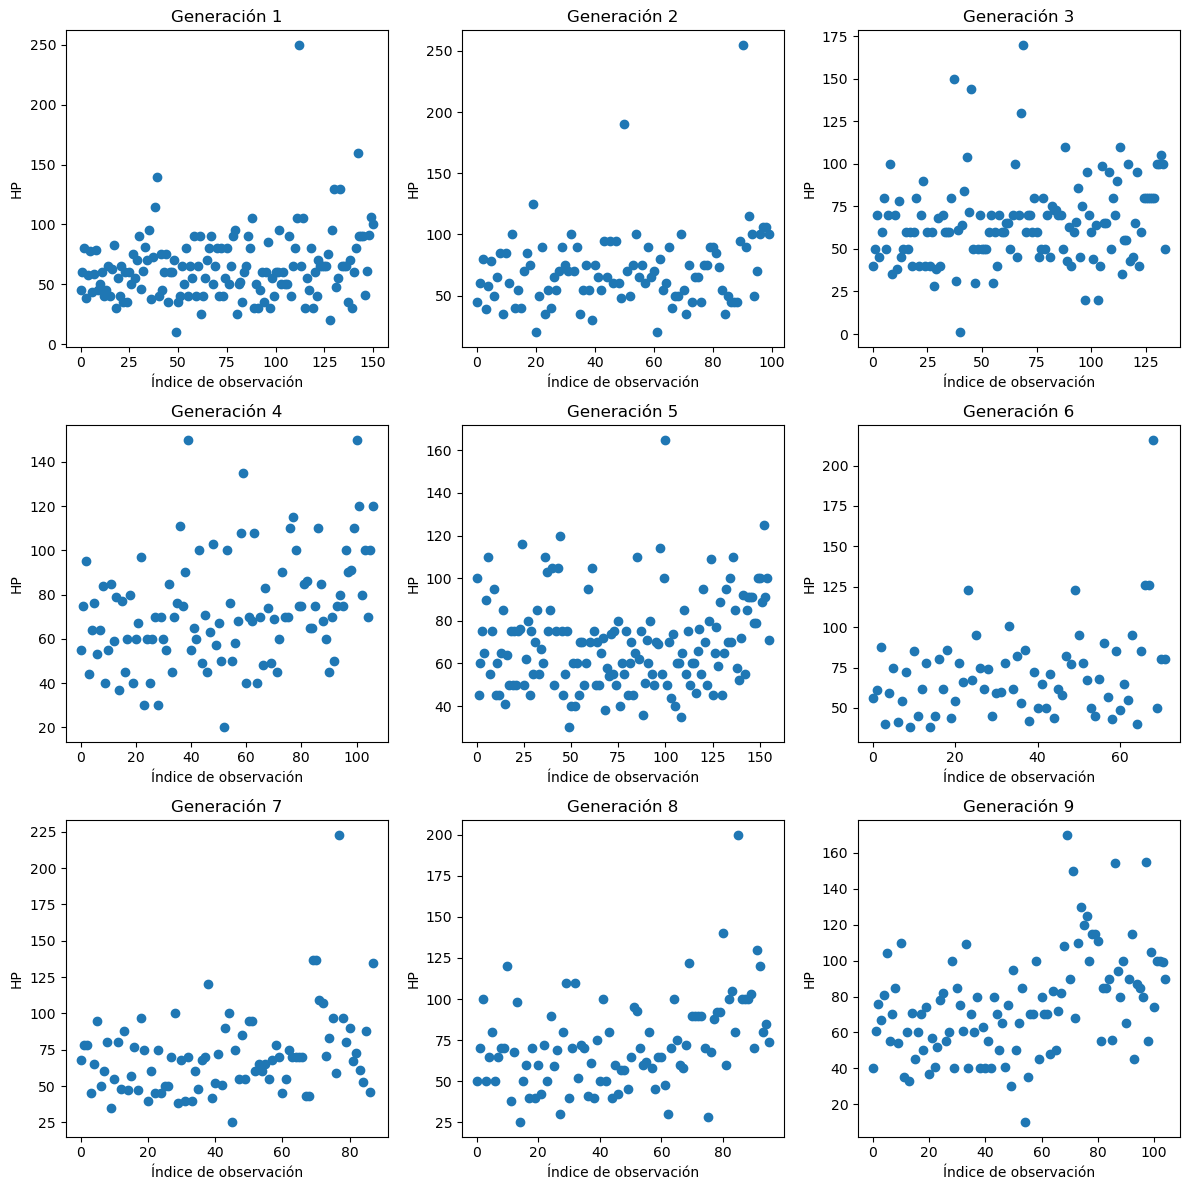

In [49]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_hp in enumerate([gen1_hp, gen2_hp, gen3_hp, gen4_hp, gen5_hp, gen6_hp, gen7_hp,
                              gen8_hp, gen9_hp]):
    axs[i].scatter(range(len(gen_hp)), gen_hp)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("HP")
fig.tight_layout()
plt.show()

In [50]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_hp_norm = StandardScaler().fit_transform(gen1_hp.values.reshape(-1, 1))
gen2_hp_norm = StandardScaler().fit_transform(gen2_hp.values.reshape(-1, 1))
gen3_hp_norm = StandardScaler().fit_transform(gen3_hp.values.reshape(-1, 1))
gen4_hp_norm = StandardScaler().fit_transform(gen4_hp.values.reshape(-1, 1))
gen5_hp_norm = StandardScaler().fit_transform(gen5_hp.values.reshape(-1, 1))
gen6_hp_norm = StandardScaler().fit_transform(gen6_hp.values.reshape(-1, 1))
gen7_hp_norm = StandardScaler().fit_transform(gen7_hp.values.reshape(-1, 1))
gen8_hp_norm = StandardScaler().fit_transform(gen8_hp.values.reshape(-1, 1))
gen9_hp_norm = StandardScaler().fit_transform(gen9_hp.values.reshape(-1, 1))

In [51]:
f_value, p_value = f_oneway(gen1_hp_norm, gen2_hp_norm, gen3_hp_norm, gen4_hp_norm, gen5_hp_norm, gen6_hp_norm, gen7_hp_norm, gen8_hp_norm, gen9_hp_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [52]:
# Seguimos con attack:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_attack = pokenova[pokenova["generation"] == 1]["attack"]
gen2_attack = pokenova[pokenova["generation"] == 2]["attack"]
gen3_attack = pokenova[pokenova["generation"] == 3]["attack"]
gen4_attack = pokenova[pokenova["generation"] == 4]["attack"]
gen5_attack = pokenova[pokenova["generation"] == 5]["attack"]
gen6_attack = pokenova[pokenova["generation"] == 6]["attack"]
gen7_attack = pokenova[pokenova["generation"] == 7]["attack"]
gen8_attack = pokenova[pokenova["generation"] == 8]["attack"]
gen9_attack = pokenova[pokenova["generation"] == 9]["attack"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_attack)
shapiro_gen2 = shapiro(gen2_attack)
shapiro_gen3 = shapiro(gen3_attack)
shapiro_gen4 = shapiro(gen4_attack)
shapiro_gen5 = shapiro(gen5_attack)
shapiro_gen6 = shapiro(gen6_attack)
shapiro_gen7 = shapiro(gen7_attack)
shapiro_gen8 = shapiro(gen8_attack)
shapiro_gen9 = shapiro(gen9_attack)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.989, p-value=0.271
Generación 2: statistic=0.984, p-value=0.260
Generación 3: statistic=0.972, p-value=0.006
Generación 4: statistic=0.992, p-value=0.825
Generación 5: statistic=0.975, p-value=0.007
Generación 6: statistic=0.966, p-value=0.050
Generación 7: statistic=0.972, p-value=0.051
Generación 8: statistic=0.972, p-value=0.041
Generación 9: statistic=0.961, p-value=0.004


In [53]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_attack, gen2_attack, gen3_attack, gen4_attack, gen5_attack, gen6_attack, gen7_attack, gen8_attack,
                    gen9_attack)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.235, p-value=0.275


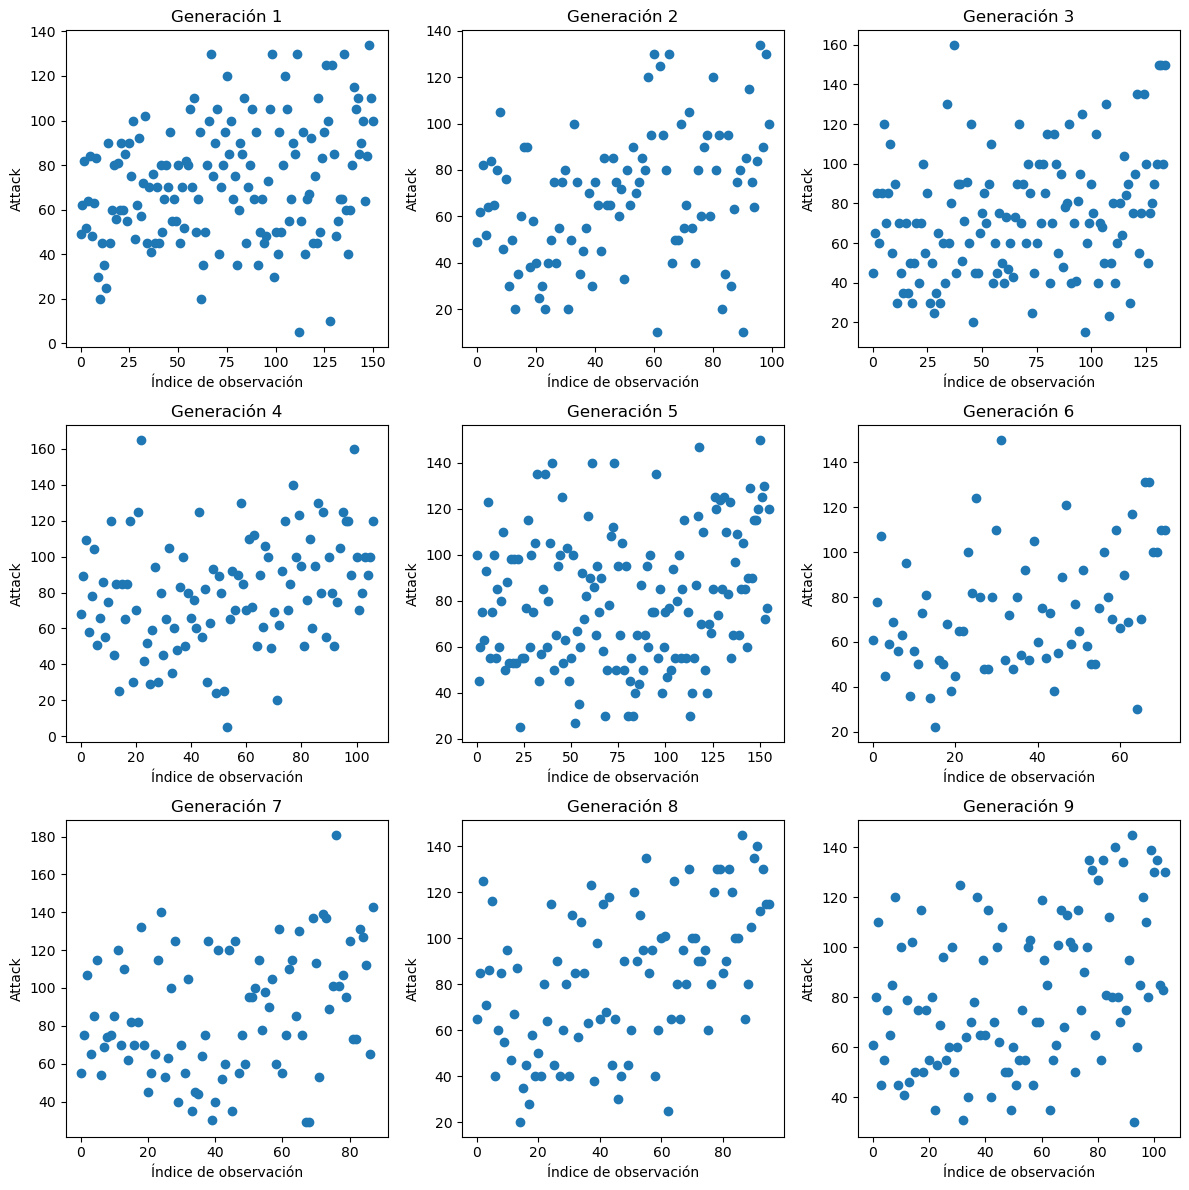

In [54]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_attack in enumerate([gen1_attack, gen2_attack, gen3_attack, gen4_attack, gen5_attack, gen6_attack, gen7_attack,
                              gen8_attack, gen9_attack]):
    axs[i].scatter(range(len(gen_attack)), gen_attack)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Attack")
fig.tight_layout()
plt.show()

In [55]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_attack_norm = StandardScaler().fit_transform(gen1_attack.values.reshape(-1, 1))
gen2_attack_norm = StandardScaler().fit_transform(gen2_attack.values.reshape(-1, 1))
gen3_attack_norm = StandardScaler().fit_transform(gen3_attack.values.reshape(-1, 1))
gen4_attack_norm = StandardScaler().fit_transform(gen4_attack.values.reshape(-1, 1))
gen5_attack_norm = StandardScaler().fit_transform(gen5_attack.values.reshape(-1, 1))
gen6_attack_norm = StandardScaler().fit_transform(gen6_attack.values.reshape(-1, 1))
gen7_attack_norm = StandardScaler().fit_transform(gen7_attack.values.reshape(-1, 1))
gen8_attack_norm = StandardScaler().fit_transform(gen8_attack.values.reshape(-1, 1))
gen9_attack_norm = StandardScaler().fit_transform(gen9_attack.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_attack_norm, gen2_attack_norm, gen3_attack_norm, gen4_attack_norm, gen5_attack_norm, gen6_attack_norm, gen7_attack_norm, gen8_attack_norm, gen9_attack_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [56]:
# Seguimos con attack:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_defense = pokenova[pokenova["generation"] == 1]["defense"]
gen2_defense = pokenova[pokenova["generation"] == 2]["defense"]
gen3_defense = pokenova[pokenova["generation"] == 3]["defense"]
gen4_defense = pokenova[pokenova["generation"] == 4]["defense"]
gen5_defense = pokenova[pokenova["generation"] == 5]["defense"]
gen6_defense = pokenova[pokenova["generation"] == 6]["defense"]
gen7_defense = pokenova[pokenova["generation"] == 7]["defense"]
gen8_defense = pokenova[pokenova["generation"] == 8]["defense"]
gen9_defense = pokenova[pokenova["generation"] == 9]["defense"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_defense)
shapiro_gen2 = shapiro(gen2_defense)
shapiro_gen3 = shapiro(gen3_defense)
shapiro_gen4 = shapiro(gen4_defense)
shapiro_gen5 = shapiro(gen5_defense)
shapiro_gen6 = shapiro(gen6_defense)
shapiro_gen7 = shapiro(gen7_defense)
shapiro_gen8 = shapiro(gen8_defense)
shapiro_gen9 = shapiro(gen9_defense)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.962, p-value=0.000
Generación 2: statistic=0.900, p-value=0.000
Generación 3: statistic=0.908, p-value=0.000
Generación 4: statistic=0.960, p-value=0.003
Generación 5: statistic=0.960, p-value=0.000
Generación 6: statistic=0.886, p-value=0.000
Generación 7: statistic=0.938, p-value=0.000
Generación 8: statistic=0.974, p-value=0.050
Generación 9: statistic=0.983, p-value=0.200


In [57]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_defense, gen2_defense, gen3_defense, gen4_defense, gen5_defense, gen6_defense, gen7_defense,
                     gen8_defense, gen9_defense)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.730, p-value=0.088


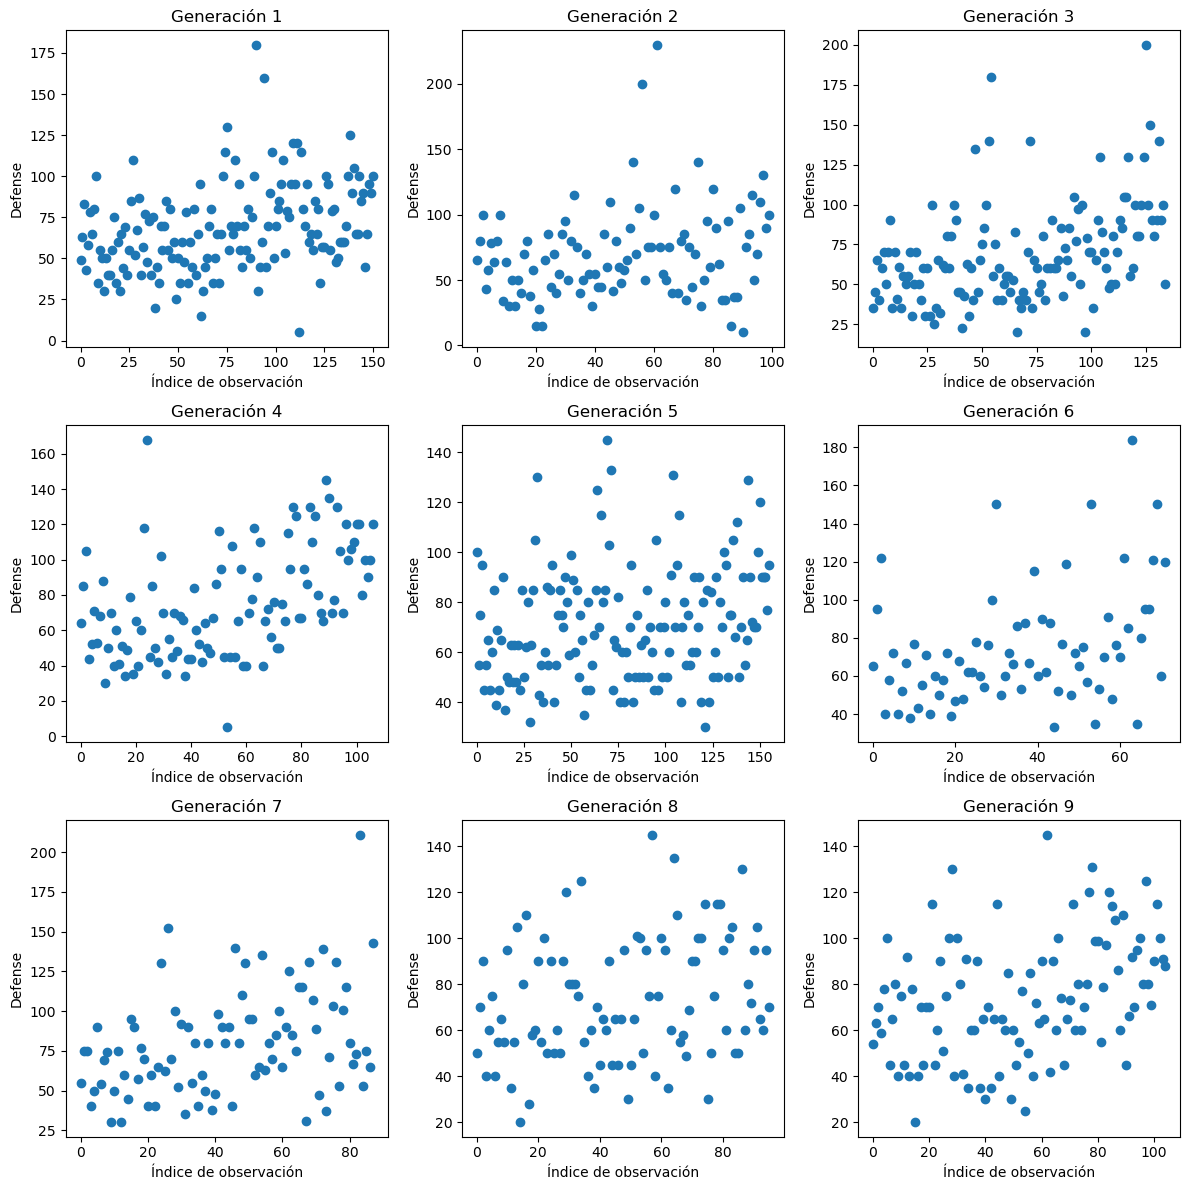

In [58]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_defense in enumerate([gen1_defense, gen2_defense, gen3_defense, gen4_defense, gen5_defense, gen6_defense, 
                                 gen7_defense, gen8_defense, gen9_defense]):
    axs[i].scatter(range(len(gen_defense)), gen_defense)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Defense")
fig.tight_layout()
plt.show()

In [59]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_defense_norm = StandardScaler().fit_transform(gen1_defense.values.reshape(-1, 1))
gen2_defense_norm = StandardScaler().fit_transform(gen2_defense.values.reshape(-1, 1))
gen3_defense_norm = StandardScaler().fit_transform(gen3_defense.values.reshape(-1, 1))
gen4_defense_norm = StandardScaler().fit_transform(gen4_defense.values.reshape(-1, 1))
gen5_defense_norm = StandardScaler().fit_transform(gen5_defense.values.reshape(-1, 1))
gen6_defense_norm = StandardScaler().fit_transform(gen6_defense.values.reshape(-1, 1))
gen7_defense_norm = StandardScaler().fit_transform(gen7_defense.values.reshape(-1, 1))
gen8_defense_norm = StandardScaler().fit_transform(gen8_defense.values.reshape(-1, 1))
gen9_defense_norm = StandardScaler().fit_transform(gen9_defense.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_defense_norm, gen2_defense_norm, gen3_defense_norm, gen4_defense_norm, gen5_defense_norm, gen6_defense_norm, gen7_defense_norm, gen8_defense_norm, gen9_defense_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [60]:
# Seguimos con sp_attack:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_sp_attack = pokenova[pokenova["generation"] == 1]["sp_attack"]
gen2_sp_attack = pokenova[pokenova["generation"] == 2]["sp_attack"]
gen3_sp_attack = pokenova[pokenova["generation"] == 3]["sp_attack"]
gen4_sp_attack = pokenova[pokenova["generation"] == 4]["sp_attack"]
gen5_sp_attack = pokenova[pokenova["generation"] == 5]["sp_attack"]
gen6_sp_attack = pokenova[pokenova["generation"] == 6]["sp_attack"]
gen7_sp_attack = pokenova[pokenova["generation"] == 7]["sp_attack"]
gen8_sp_attack = pokenova[pokenova["generation"] == 8]["sp_attack"]
gen9_sp_attack = pokenova[pokenova["generation"] == 9]["sp_attack"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_attack)
shapiro_gen2 = shapiro(gen2_sp_attack)
shapiro_gen3 = shapiro(gen3_sp_attack)
shapiro_gen4 = shapiro(gen4_sp_attack)
shapiro_gen5 = shapiro(gen5_sp_attack)
shapiro_gen6 = shapiro(gen6_sp_attack)
shapiro_gen7 = shapiro(gen7_sp_attack)
shapiro_gen8 = shapiro(gen8_sp_attack)
shapiro_gen9 = shapiro(gen9_sp_attack)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.967, p-value=0.001
Generación 2: statistic=0.978, p-value=0.091
Generación 3: statistic=0.973, p-value=0.008
Generación 4: statistic=0.976, p-value=0.052
Generación 5: statistic=0.951, p-value=0.000
Generación 6: statistic=0.957, p-value=0.015
Generación 7: statistic=0.954, p-value=0.004
Generación 8: statistic=0.941, p-value=0.000
Generación 9: statistic=0.921, p-value=0.000


In [61]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_attack, gen2_sp_attack, gen3_sp_attack, gen4_sp_attack, gen5_sp_attack, gen6_sp_attack, 
                     gen7_sp_attack, gen8_sp_attack, gen9_sp_attack)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.113, p-value=0.352


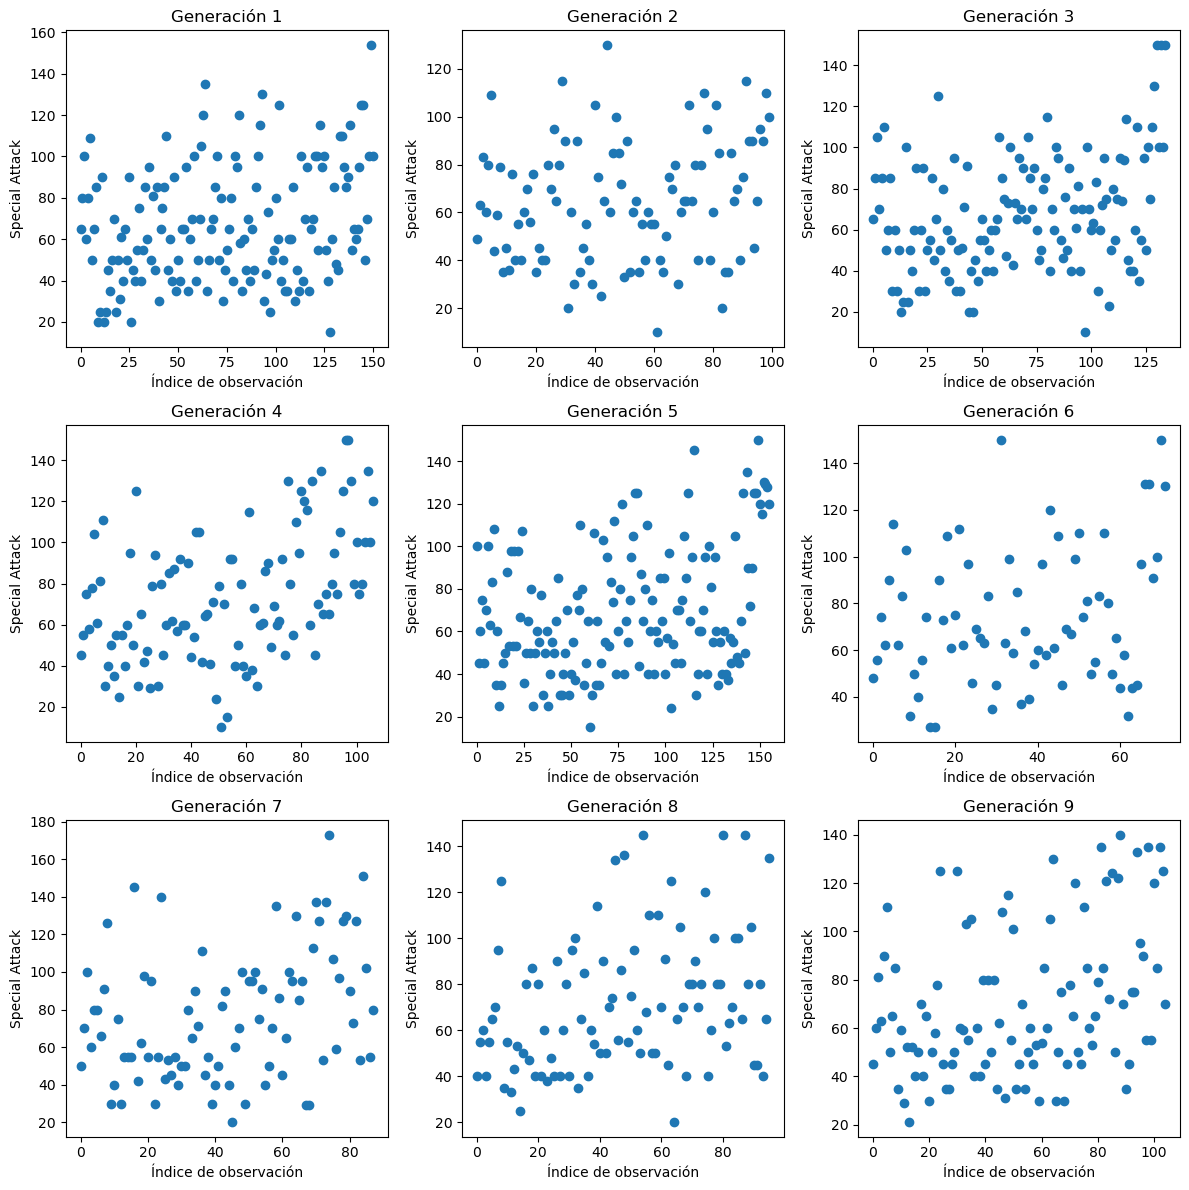

In [62]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_attack in enumerate([gen1_sp_attack, gen2_sp_attack, gen3_sp_attack, gen4_sp_attack, gen5_sp_attack, 
                                   gen6_sp_attack, gen7_sp_attack, gen8_sp_attack, gen9_sp_attack]):
    axs[i].scatter(range(len(gen_sp_attack)), gen_sp_attack)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Attack")
fig.tight_layout()
plt.show()

In [63]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_attack_norm = StandardScaler().fit_transform(gen1_sp_attack.values.reshape(-1, 1))
gen2_sp_attack_norm = StandardScaler().fit_transform(gen2_sp_attack.values.reshape(-1, 1))
gen3_sp_attack_norm = StandardScaler().fit_transform(gen3_sp_attack.values.reshape(-1, 1))
gen4_sp_attack_norm = StandardScaler().fit_transform(gen4_sp_attack.values.reshape(-1, 1))
gen5_sp_attack_norm = StandardScaler().fit_transform(gen5_sp_attack.values.reshape(-1, 1))
gen6_sp_attack_norm = StandardScaler().fit_transform(gen6_sp_attack.values.reshape(-1, 1))
gen7_sp_attack_norm = StandardScaler().fit_transform(gen7_sp_attack.values.reshape(-1, 1))
gen8_sp_attack_norm = StandardScaler().fit_transform(gen8_sp_attack.values.reshape(-1, 1))
gen9_sp_attack_norm = StandardScaler().fit_transform(gen9_sp_attack.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_attack_norm, gen2_sp_attack_norm, gen3_sp_attack_norm, gen4_sp_attack_norm, gen5_sp_attack_norm, gen6_sp_attack_norm, gen7_sp_attack_norm, gen8_sp_attack_norm, gen9_sp_attack_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [64]:
# Seguimos con sp_defense:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_sp_defense = pokenova[pokenova["generation"] == 1]["sp_defense"]
gen2_sp_defense = pokenova[pokenova["generation"] == 2]["sp_defense"]
gen3_sp_defense = pokenova[pokenova["generation"] == 3]["sp_defense"]
gen4_sp_defense = pokenova[pokenova["generation"] == 4]["sp_defense"]
gen5_sp_defense = pokenova[pokenova["generation"] == 5]["sp_defense"]
gen6_sp_defense = pokenova[pokenova["generation"] == 6]["sp_defense"]
gen7_sp_defense = pokenova[pokenova["generation"] == 7]["sp_defense"]
gen8_sp_defense = pokenova[pokenova["generation"] == 8]["sp_defense"]
gen9_sp_defense = pokenova[pokenova["generation"] == 9]["sp_defense"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_defense)
shapiro_gen2 = shapiro(gen2_sp_defense)
shapiro_gen3 = shapiro(gen3_sp_defense)
shapiro_gen4 = shapiro(gen4_sp_defense)
shapiro_gen5 = shapiro(gen5_sp_defense)
shapiro_gen6 = shapiro(gen6_sp_defense)
shapiro_gen7 = shapiro(gen7_sp_defense)
shapiro_gen8 = shapiro(gen8_sp_defense)
shapiro_gen9 = shapiro(gen9_sp_defense)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.983, p-value=0.055
Generación 2: statistic=0.886, p-value=0.000
Generación 3: statistic=0.923, p-value=0.000
Generación 4: statistic=0.961, p-value=0.003
Generación 5: statistic=0.965, p-value=0.001
Generación 6: statistic=0.920, p-value=0.000
Generación 7: statistic=0.967, p-value=0.023
Generación 8: statistic=0.977, p-value=0.091
Generación 9: statistic=0.978, p-value=0.079


In [65]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_defense, gen2_sp_defense, gen3_sp_defense, gen4_sp_defense, gen5_sp_defense, gen6_sp_defense, 
                     gen7_sp_defense, gen8_sp_defense, gen9_sp_defense)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.561, p-value=0.132


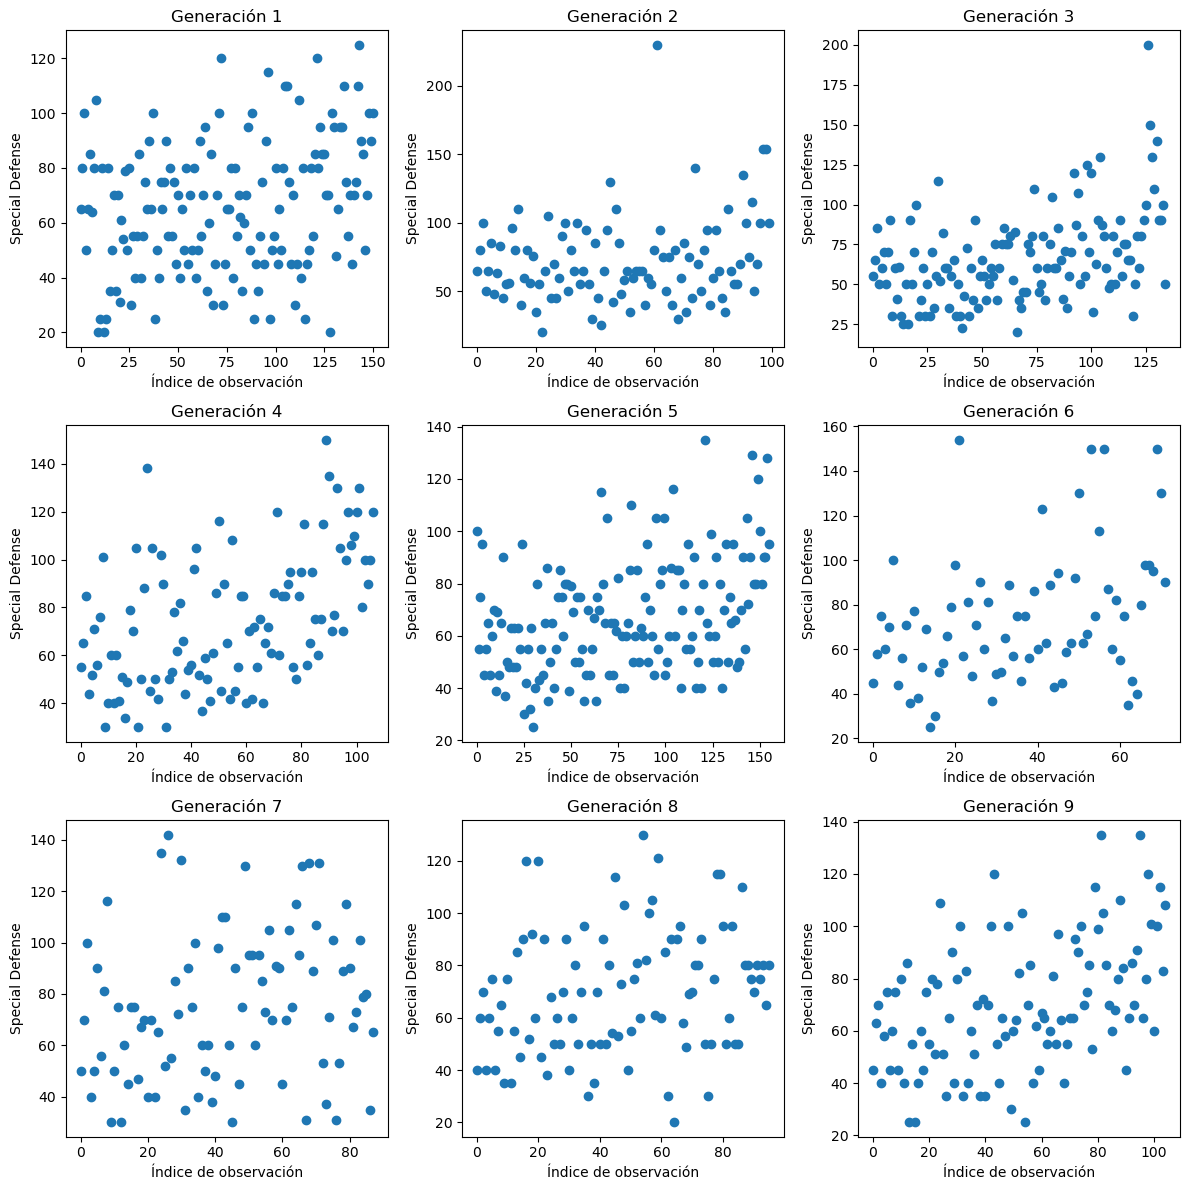

In [66]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_defense in enumerate([gen1_sp_defense, gen2_sp_defense, gen3_sp_defense, gen4_sp_defense, gen5_sp_defense, 
                                   gen6_sp_defense, gen7_sp_defense, gen8_sp_defense, gen9_sp_defense]):
    axs[i].scatter(range(len(gen_sp_defense)), gen_sp_defense)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Defense")
fig.tight_layout()
plt.show()

In [67]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_defense_norm = StandardScaler().fit_transform(gen1_sp_defense.values.reshape(-1, 1))
gen2_sp_defense_norm = StandardScaler().fit_transform(gen2_sp_defense.values.reshape(-1, 1))
gen3_sp_defense_norm = StandardScaler().fit_transform(gen3_sp_defense.values.reshape(-1, 1))
gen4_sp_defense_norm = StandardScaler().fit_transform(gen4_sp_defense.values.reshape(-1, 1))
gen5_sp_defense_norm = StandardScaler().fit_transform(gen5_sp_defense.values.reshape(-1, 1))
gen6_sp_defense_norm = StandardScaler().fit_transform(gen6_sp_defense.values.reshape(-1, 1))
gen7_sp_defense_norm = StandardScaler().fit_transform(gen7_sp_defense.values.reshape(-1, 1))
gen8_sp_defense_norm = StandardScaler().fit_transform(gen8_sp_defense.values.reshape(-1, 1))
gen9_sp_defense_norm = StandardScaler().fit_transform(gen9_sp_defense.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_defense_norm, gen2_sp_defense_norm, gen3_sp_defense_norm, gen4_sp_defense_norm, gen5_sp_defense_norm, gen6_sp_defense_norm, gen7_sp_defense_norm, gen8_sp_defense_norm, gen9_sp_defense_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional
